# Zeisel15 dataset
Zeisel15 dataset consists single cell transcriptome of 3005 mice cerebral cortex cells

## Reference:
Cell types in the mouse cortex and hippocampus revealed by single-cell RNA-seq
BY AMIT ZEISEL, ANA B. MUÑOZ-MANCHADO, SIMONE CODELUPPI, PETER LÖNNERBERG, GIOELE LA MANNO, ANNA JURÉUS, SUELI MARQUES, HERMANY MUNGUBA, LIQUN HE, CHRISTER BETSHOLTZ, CHARLOTTE ROLNY, GONÇALO CASTELO-BRANCO, JENS HJERLING-LEFFLER, STEN LINNARSSON
SCIENCE06 MAR 2015 : 1138-1142

## GEO:
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE60361

In [1]:
import warnings
warnings.filterwarnings("ignore")
from SCCAF import *
import urllib.request
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import KMDHierarchicalClustering.KMDclustering.cluster_scoring as cluster_scoring
import KMDHierarchicalClustering.KMDclustering.KMDAlgo as KMDAlgo
import time 

In [2]:
# download preproccesd file - dataset Zeisel 15 as previously described in https://github.com/SCCAF/sccaf_example/blob/master/preprocessing/%5BGroundTruth%5DMouse_Cortex_Zeisel2015.ipynb
urllib.request.urlretrieve("https://drive.google.com/uc?export=download&id=1hprRFkEk8q27kqrt9RLvY6aqu6XWPb2C", 'Zeisel.h5')
ad = sc.read(filename="Zeisel.h5")
t = time.time()

In [3]:
# filter overexprecced cells 
print (ad.shape)
sc.pp.filter_cells(ad, max_genes=1600)
print (ad.shape)

(3005, 2000)
(2361, 2000)


In [4]:
# convert cell names to list of cluster numbers 
label_dict = {}
index = 0
y_true = []
for cell in ad.obs['cell']:
    if cell in label_dict:
        y_true.append(label_dict[cell])
    else:
        label_dict[cell]=index
        y_true.append(label_dict[cell])
        index+=1

Predicted k is : 6
8


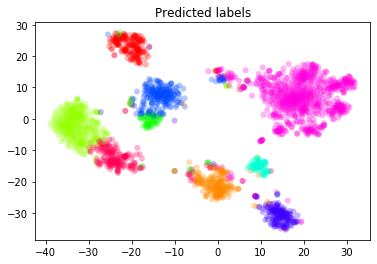

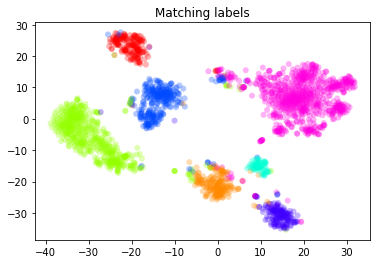

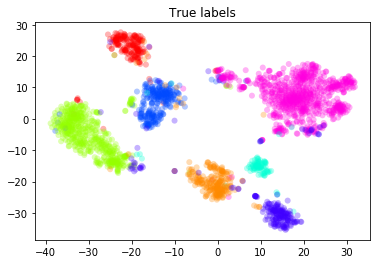

In [5]:
kmd_cluster = KMDAlgo.KMDLinkage(k='compute',affinity = 'correlation',n_clusters=9, min_cluster_size= 10 , certainty=0.5, k_scan_range = (6,10,10))
kmd_cluster.fit(ad.X)
y_pred = kmd_cluster.predict(ad.X)
cluster_scoring.tsne_presentation(kmd_cluster.dists,y_true,y_pred)

In [6]:
print ('NMI')
print (normalized_mutual_info_score(y_true, y_pred))
print ('ARI')
print (adjusted_rand_score(y_true, y_pred))
print('accuracy')
print(cluster_scoring.hungarian_acc(y_true, y_pred)[0])
print('Total running time on toy dataset: '+str(time.time()-t)+ ' seconds')

NMI
0.7796240339344656
ARI
0.8067580429882963
accuracy
0.8348157560355781
Total running time on toy dataset: 444.5145916938782 seconds
